# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
load_dotenv()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\withn\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [16]:
# Read your api key environment variable


In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(q="bitcoin", language="en", sort_by= "relevancy")
bitcoin_headlines

{'status': 'ok',
 'totalResults': 9614,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Kris Holt',
   'title': 'New York passes a bill to limit bitcoin mining',
   'description': "New York lawmakers have passed a bill\r\n that would temporarily ban new bitcoin\r\n mining operations. Early on Friday, state senators voted 36-27 to pass the legislation. It's now bound for the desk of Governor Kathy Hochul, who will sign it into law or veto th…",
   'url': 'https://www.engadget.com/new-york-cryptocurrency-bill-bitcoin-mining-climate-change-161126292.html',
   'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-05/a8217250-bdfa-11eb-bfc4-2663225cea83',
   'publishedAt': '2022-06-03T16:11:26Z',
   'content': "New York lawmakers have passed a bill\r\n that would temporarily ban new bitcoin\r\n mining operations. Early on Friday, state senators voted 36-27 to pass the legislation. It's now bound for the desk of… [+2036 chars]"},
  {'source': {'id': 

In [5]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(q="ethereum", language="en", sort_by= "relevancy")
ethereum_headlines

{'status': 'ok',
 'totalResults': 4543,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Jon Fingas',
   'title': "Here's what NFTs look like on Instagram",
   'description': "Meta has revealed more of how NFTs will work on Instagram. In the US-based test, you can show what you've bought or created for free by connecting your Instagram account to a compatible digital wallet and posting for the world to see. If you like, the social …",
   'url': 'https://www.engadget.com/instagram-nft-details-131020868.html',
   'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2022-05/2546c160-d05e-11ec-b75e-e45eaa8c5b2b',
   'publishedAt': '2022-05-10T13:10:20Z',
   'content': "Meta has revealed more of how NFTs will work on Instagram. In the US-based test, you can show what you've bought or created for free by connecting your Instagram account to a compatible digital walle… [+1223 chars]"},
  {'source': {'id': None, 'name': 'Gizmodo.com'},
   'author': 'Kyle Ba

In [6]:
# Create the Bitcoin sentiment scores DataFrame
articles = []
for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neg = results["neg"]
        neu = results["neu"]

        articles.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
    except AttributeError:
        pass
btc = pd.DataFrame(articles)
btc.head()

,text,compound,positive,negative,neutral
0,New York lawmakers have passed a bill\r\n that...,-0.5574,0.000,0.098,0.902
1,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964
2,A new study on bitcoin calls into question whe...,0.5267,0.124,0.000,0.876
3,"Image caption, President Faustin-Archange Toua...",0.5106,0.164,0.000,0.836
4,You can now reportedly pay for your burritos a...,-0.1027,0.000,0.040,0.960


In [7]:
# Create the Ethereum sentiment scores DataFrame
articles = []
for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neg = results["neg"]
        neu = results["neu"]

        articles.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
    except AttributeError:
        pass
eth = pd.DataFrame(articles)
eth.head()

,text,compound,positive,negative,neutral
0,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865
1,GameStop has officially thrown itself headlong...,-0.1027,0.000,0.040,0.960
2,The ability to conduct external transfers on P...,0.3182,0.059,0.000,0.941
3,GameStop is going all-in on crypto. The video ...,0.1280,0.046,0.000,0.954
4,New York lawmakers have passed a bill\r\n that...,-0.5574,0.000,0.098,0.902


In [8]:
# Describe the Bitcoin Sentiment
btc.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.087630,0.048200,0.065450,0.886450
std,0.403464,0.049645,0.069041,0.073103
min,-0.859300,0.000000,0.000000,0.646000
25%,-0.386825,0.000000,0.000000,0.858000
50%,-0.051350,0.041500,0.063000,0.888500
75%,0.249275,0.077500,0.087500,0.924250
max,0.526700,0.164000,0.300000,1.000000


In [9]:
# Describe the Ethereum Sentiment
eth.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.008160,0.041350,0.040550,0.918200
std,0.398847,0.051657,0.049995,0.052626
min,-0.690800,0.000000,0.000000,0.822000
25%,-0.381800,0.000000,0.000000,0.891250
50%,0.000000,0.017000,0.020000,0.924000
75%,0.323650,0.072750,0.077000,0.955000
max,0.690800,0.178000,0.178000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: ETH has a higher mean than btc

Q: Which coin had the highest compound score?

A: it would be BTC

Q. Which coin had the highest positive score?

A: BTC

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
wnl = WordNetLemmatizer()


# Ceate a list of stopwords
stop = stopwords.words('english')

# Expand the default stopwords list if necessary
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)

In [16]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenestext."""
    
    # Remove the punctuation from text
    words = word_tokenize(text)
   
    # Create a tokenized list of the words
    words = list(filter(lambda t : t not in punctuation, words))
    
    # Lemmatize words into root words
    words = list(filter(lambda t : t.lower(), words))
   
    # Convert the words to lowercase
    words = list(filter(lambda t : t.lower() not in stop, words))
    
    # Remove the stop words
    tokens = [wnl.lemmatize(word) for word in words]
    
    return tokens

In [17]:
# Create a new tokens column for Bitcoin
btc["tokens"] = btc.text.apply(tokenizer)
btc.head()

,text,compound,positive,negative,neutral,tokens
0,New York lawmakers have passed a bill\r\n that...,-0.5574,0.000,0.098,0.902,"[New, York, lawmaker, passed, bill, would, tem..."
1,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964,"[even, though, number, women-focused, crypto, ..."
2,A new study on bitcoin calls into question whe...,0.5267,0.124,0.000,0.876,"[new, study, bitcoin, call, question, whether,..."
3,"Image caption, President Faustin-Archange Toua...",0.5106,0.164,0.000,0.836,"[Image, caption, President, Faustin-Archange, ..."
4,You can now reportedly pay for your burritos a...,-0.1027,0.000,0.040,0.960,"[reportedly, pay, burrito, taco, Bitcoin, digi..."


In [18]:
# Create a new tokens column for Ethereum
eth["tokens"] = eth.text.apply(tokenizer)
eth.head()

,text,compound,positive,negative,neutral,tokens
0,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865,"[Meta, revealed, NFTs, work, Instagram, US-bas..."
1,GameStop has officially thrown itself headlong...,-0.1027,0.000,0.040,0.960,"[GameStop, officially, thrown, headlong, web3,..."
2,The ability to conduct external transfers on P...,0.3182,0.059,0.000,0.941,"[ability, conduct, external, transfer, PayPal,..."
3,GameStop is going all-in on crypto. The video ...,0.1280,0.046,0.000,0.954,"[GameStop, going, all-in, crypto, video, game,..."
4,New York lawmakers have passed a bill\r\n that...,-0.5574,0.000,0.098,0.902,"[New, York, lawmaker, passed, bill, would, tem..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [19]:
from collections import Counter
from nltk import ngrams

In [20]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(btc.text.str.cat()), N)
Counter(grams).most_common(20)

[(('Reuters', 'Bitcoin'), 4),
 (('previous', 'close'), 3),
 (('world', 'biggest'), 3),
 (('biggest', 'best-known'), 3),
 (('best-known', 'cryptocurrency'), 3),
 (('char', 'May'), 3),
 (('new', 'blockchain'), 3),
 (('Seth', 'Green'), 3),
 (('digital', 'currency'), 2),
 (('char', 'Image'), 2),
 (('pay', 'burrito'), 2),
 (('dramatic', 'drop'), 2),
 (('close', 'Bitcoin'), 2),
 (('Bitcoin', 'world'), 2),
 (('GMT', 'Monday'), 2),
 (('interest', 'rate'), 2),
 (('char', 'Terra'), 2),
 (('blockchain', 'new'), 2),
 (('new', 'luna'), 2),
 (('luna', 'token'), 2)]

In [21]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(eth.text.str.cat()), N)
Counter(grams).most_common(20)

[(('Reuters', 'Bitcoin'), 3),
 (('previous', 'close'), 3),
 (('world', 'biggest'), 3),
 (('biggest', 'best-known'), 3),
 (('best-known', 'cryptocurrency'), 3),
 (('char', 'GameStop'), 2),
 (('Lite', 'Hash'), 2),
 (('Hash', 'Rate'), 2),
 (('graphic', 'card'), 2),
 (('char', 'May'), 2),
 (('close', 'Bitcoin'), 2),
 (('Bitcoin', 'world'), 2),
 (('GMT', 'Monday'), 2),
 (('char', 'cryptocurrency'), 2),
 (('cryptocurrency', 'boom'), 2),
 (('boom', 'past'), 2),
 (('past', 'year'), 2),
 (('year', 'helped'), 2),
 (('helped', 'propel'), 2),
 (('propel', 'newer'), 2)]

In [22]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [23]:
# Use token_count to get the top 10 words for Bitcoin
all_tokens = tokenizer(btc.text.str.cat())
token_count(all_tokens, 10)

[('char', 19),
 ('Bitcoin', 10),
 ('new', 8),
 ('cryptocurrency', 8),
 ('world', 6),
 ('biggest', 5),
 ('week', 5),
 ('Reuters', 5),
 ('bitcoin', 4),
 ('luna', 4)]

In [24]:
# Use token_count to get the top 10 words for Ethereum
all_tokens = tokenizer(eth.text.str.cat())
token_count(all_tokens, 10)

[('char', 20),
 ('cryptocurrency', 11),
 ('Bitcoin', 8),
 ('world', 5),
 ('year', 5),
 ('NFTs', 4),
 ('digital', 4),
 ('Reuters', 4),
 ('market', 4),
 ('new', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

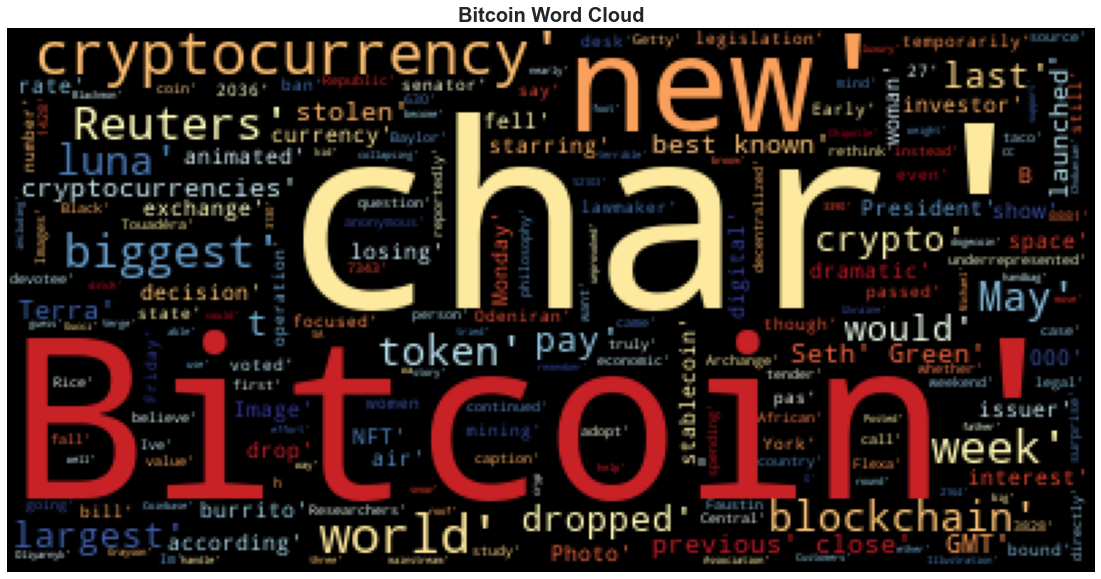

In [32]:
# Generate the Bitcoin word cloud
terms_list = str(btc["tokens"].tolist())
wordcloud = WordCloud(colormap="RdYlBu").generate(terms_list)
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Bitcoin Word Cloud", fontdict=fontdict)
plt.show()

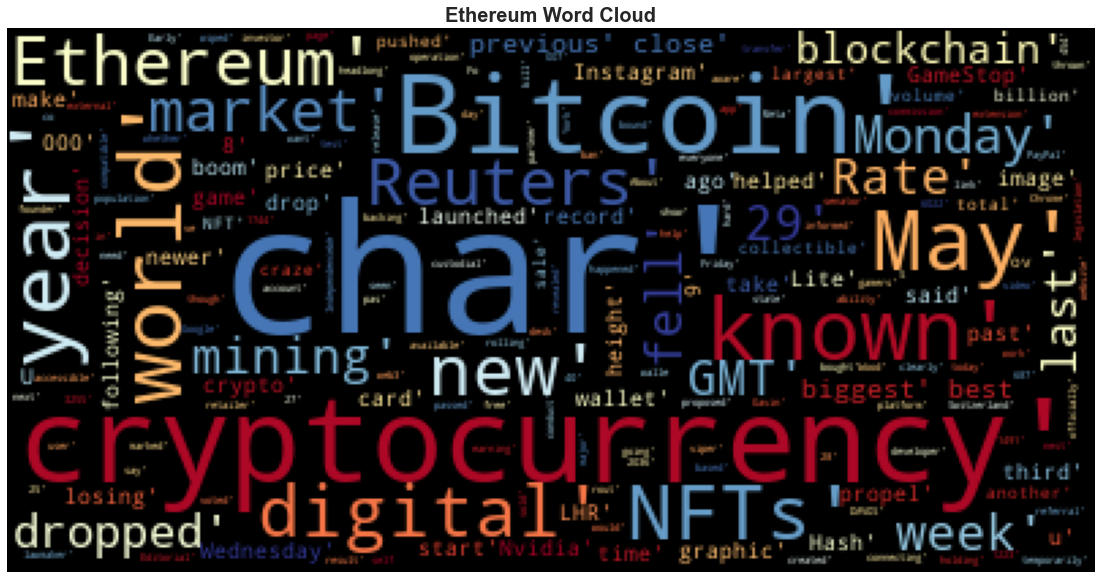

In [34]:
# Generate the Ethereum word cloud
terms_list = str(eth["tokens"].tolist())
wordcloud = WordCloud(colormap="RdYlBu").generate(terms_list)
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Ethereum Word Cloud", fontdict=fontdict)
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [36]:
import spacy
from spacy import displacy

In [37]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [38]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [39]:
# Concatenate all of the Bitcoin text together
all_btc_text = btc.text.str.cat()
all_btc_text

"New York lawmakers have passed a bill\r\n that would temporarily ban new bitcoin\r\n mining operations. Early on Friday, state senators voted 36-27 to pass the legislation. It's now bound for the desk of… [+2036 chars]Now, even though there are a number of women-focused crypto spaces, Odeniran says women are still underrepresented. Ive been in spaces where Im the only Black person, or the only woman, or the only B… [+3828 chars]A new study on bitcoin calls into question whether the digital currency is truly as decentralized and anonymous as its biggest devotees would have you believe. \r\n Researchers from Baylor, Rice, and t… [+7343 chars]Image caption, President Faustin-Archange Touadéra wants to rethink his country's economic philosophy\r\nThe Central African Republic's decision to adopt Bitcoin as legal tender came as a surprise to m… [+8881 chars]You can now reportedly pay for your burritos and tacos with Bitcoin and other digital currencies, in case you don't mind spending your 

In [40]:
# Run the NER processor on all of the text
doc = nlp(all_btc_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [41]:
# Render the visualization
displacy.render(doc, style='ent')

In [42]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

New York GPE
Friday DATE
36 CARDINAL
Odeniran GPE
Rice PERSON
Faustin-Archange Touadéra ORG
The Central African Republic's ORG
Getty Images ORG
the weekend DATE
34,000 MONEY
27,630 MONEY
Coinbase PERSON
nearly three feet QUANTITY
Chipotle PERSON
Grayson Blackmon PERSON
Verge ORG
Oliyarnyk / CC-BY ORG
Michael Chobanian PERSON
the Blockchain Association of Ukraine ORG
Bitcoin PERSON
Gucci PERSON
week DATE
Kristy Kilburn PERSON
May 11 DATE
Reuters ORG
7.23% PERCENT
28,758.29 MONEY
22:05 GMT TIME
Wednesday DATE
2,241.68 MONEY
Bitcoin PERSON
40.4% PERCENT
+361 CARDINAL
9 CARDINAL
Reuters ORG
7.81% PERCENT
31,333.41 MONEY
Monday DATE
2,655.98 MONEY
Bitcoin PERSON
35% PERCENT
6 CARDINAL
Reuters ORG
5.2% PERCENT
31,441.76 MONEY
2000 CARDINAL
Monday DATE
1,552.78 MONEY
34.8% PERCENT
year DATE
last July DATE
33,000 MONEY
the week DATE
last week DATE
Fed ORG
Mexican NORP
North London GPE
a few weeks ago DATE
24 CARDINAL
Reuters ORG
winter DATE
its ninth week DATE
10 CARDINAL
Reuters ORG
Seth Gree

---

### Ethereum NER

In [43]:
# Concatenate all of the Ethereum text together
all_eth_text = eth.text.str.cat()
all_eth_text

'Meta has revealed more of how NFTs will work on Instagram. In the US-based test, you can show what you\'ve bought or created for free by connecting your Instagram account to a compatible digital walle… [+1223 chars]GameStop has officially thrown itself headlong into the web3 vipers nest with a new app release, though its hard to say whether its proposed population of gamers and game developers will take up the … [+3255 chars]The ability to conduct external transfers on PayPal\'s crypto platform, an image of which can be seen below, will start rolling out to users today and be available to everyone in the U.S. in the next … [+687 chars]GameStop is going all-in on crypto. The video game retailer launched\xa0its own self-custodial Ethereum digital wallet, it said Monday. The wallet will be accessible through a Google Chrome extension an… [+1491 chars]New York lawmakers have passed a bill\r\n that would temporarily ban new bitcoin\r\n mining operations. Early on Friday, state senators vot

In [44]:
# Run the NER processor on all of the text
doc = nlp(all_eth_text)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [45]:
# Render the visualization
displacy.render(doc, style='ent')

In [46]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Meta ORG
Instagram ORG
US GPE
Instagram ORG
PayPal ORG
today DATE
U.S. GPE
Monday DATE
chars]New York GPE
Friday DATE
36 CARDINAL
Switzerland GPE
May 25 DATE
Reuters ORG
Gavin Wood PERSON
chars]40 days ago DATE
47,454 MONEY
34,007 MONEY
28%.About a third CARDINAL
this week DATE
Nvidia PERSON
Ethereum ORG
Reuters ORG
7.23% PERCENT
28,758.29 MONEY
22:05 GMT TIME
Wednesday DATE
2,241.68 MONEY
Bitcoin PERSON
40.4% PERCENT
+361 CARDINAL
9 CARDINAL
Reuters ORG
7.81% PERCENT
31,333.41 MONEY
Monday DATE
2,655.98 MONEY
Bitcoin PERSON
35% PERCENT
6 CARDINAL
Reuters ORG
5.2% PERCENT
31,441.76 MONEY
2000 CARDINAL
Monday DATE
1,552.78 MONEY
34.8% PERCENT
year DATE
8 CARDINAL
Nvidia ORG
LHR ORG
Lite Hash Rate WORK_OF_ART
last year DATE
last July DATE
33,000 MONEY
the week DATE
last week DATE
Fed ORG
the past few years DATE
NFT ORG
$29 billion MONEY
first ORDINAL
several years ago DATE
Kim Kardashian PERSON
Floyd Mayweather PERSON
NBA ORG
Paul Pierce PERSON
Getty Images ORG
the weekend DATE
34,000 MO

---